Let's figure out what factors influence its revenue. 
- Can factors such as air temperature and fuel cost influence the success of a huge company along with the purchasing power index and seasonal discounts? 
- And how does machine learning minimize costs and increase economic impact?


The data contains the following columns:

-  Store: Store number
- Date: Sales week start date
- Weekly_Sales: Sales
- Holiday_Flag: Mark on the presence or absence of a holiday
- Temperature: Air temperature in the region
- Fuel_Price: Fuel cost in the region
- CPI: Consumer price index
- Unemployment: Unemployment rate


## Import libraries

In [149]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import calendar
import seaborn as sns

## Import dataset

In [150]:
dataset = pd.read_csv("../data/Walmart_Sales.csv")

dataset.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [151]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### handle the date

In [152]:
def Season_getter(quarter):
    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [153]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

dataset.insert(1, 'year', dataset['Date'].dt.year)
dataset.insert(2, 'month', dataset['Date'].dt.month_name())
dataset.insert(3, 'day', dataset['Date'].dt.day)
dataset.insert(4, 'day of the week', dataset['Date'].dt.dayofweek)
dataset.insert(5, 'week', dataset['Date'].dt.isocalendar().week)
dataset.insert(6, 'season', dataset['Date'].dt.quarter.apply(Season_getter))

In [154]:
dataset.head()

,Store,year,month,day,day of the week,week,season,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010,February,5,4,5,Winter,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010,February,12,4,6,Winter,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010,February,19,4,7,Winter,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010,February,26,4,8,Winter,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010,March,5,4,9,Winter,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [155]:
dataset[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


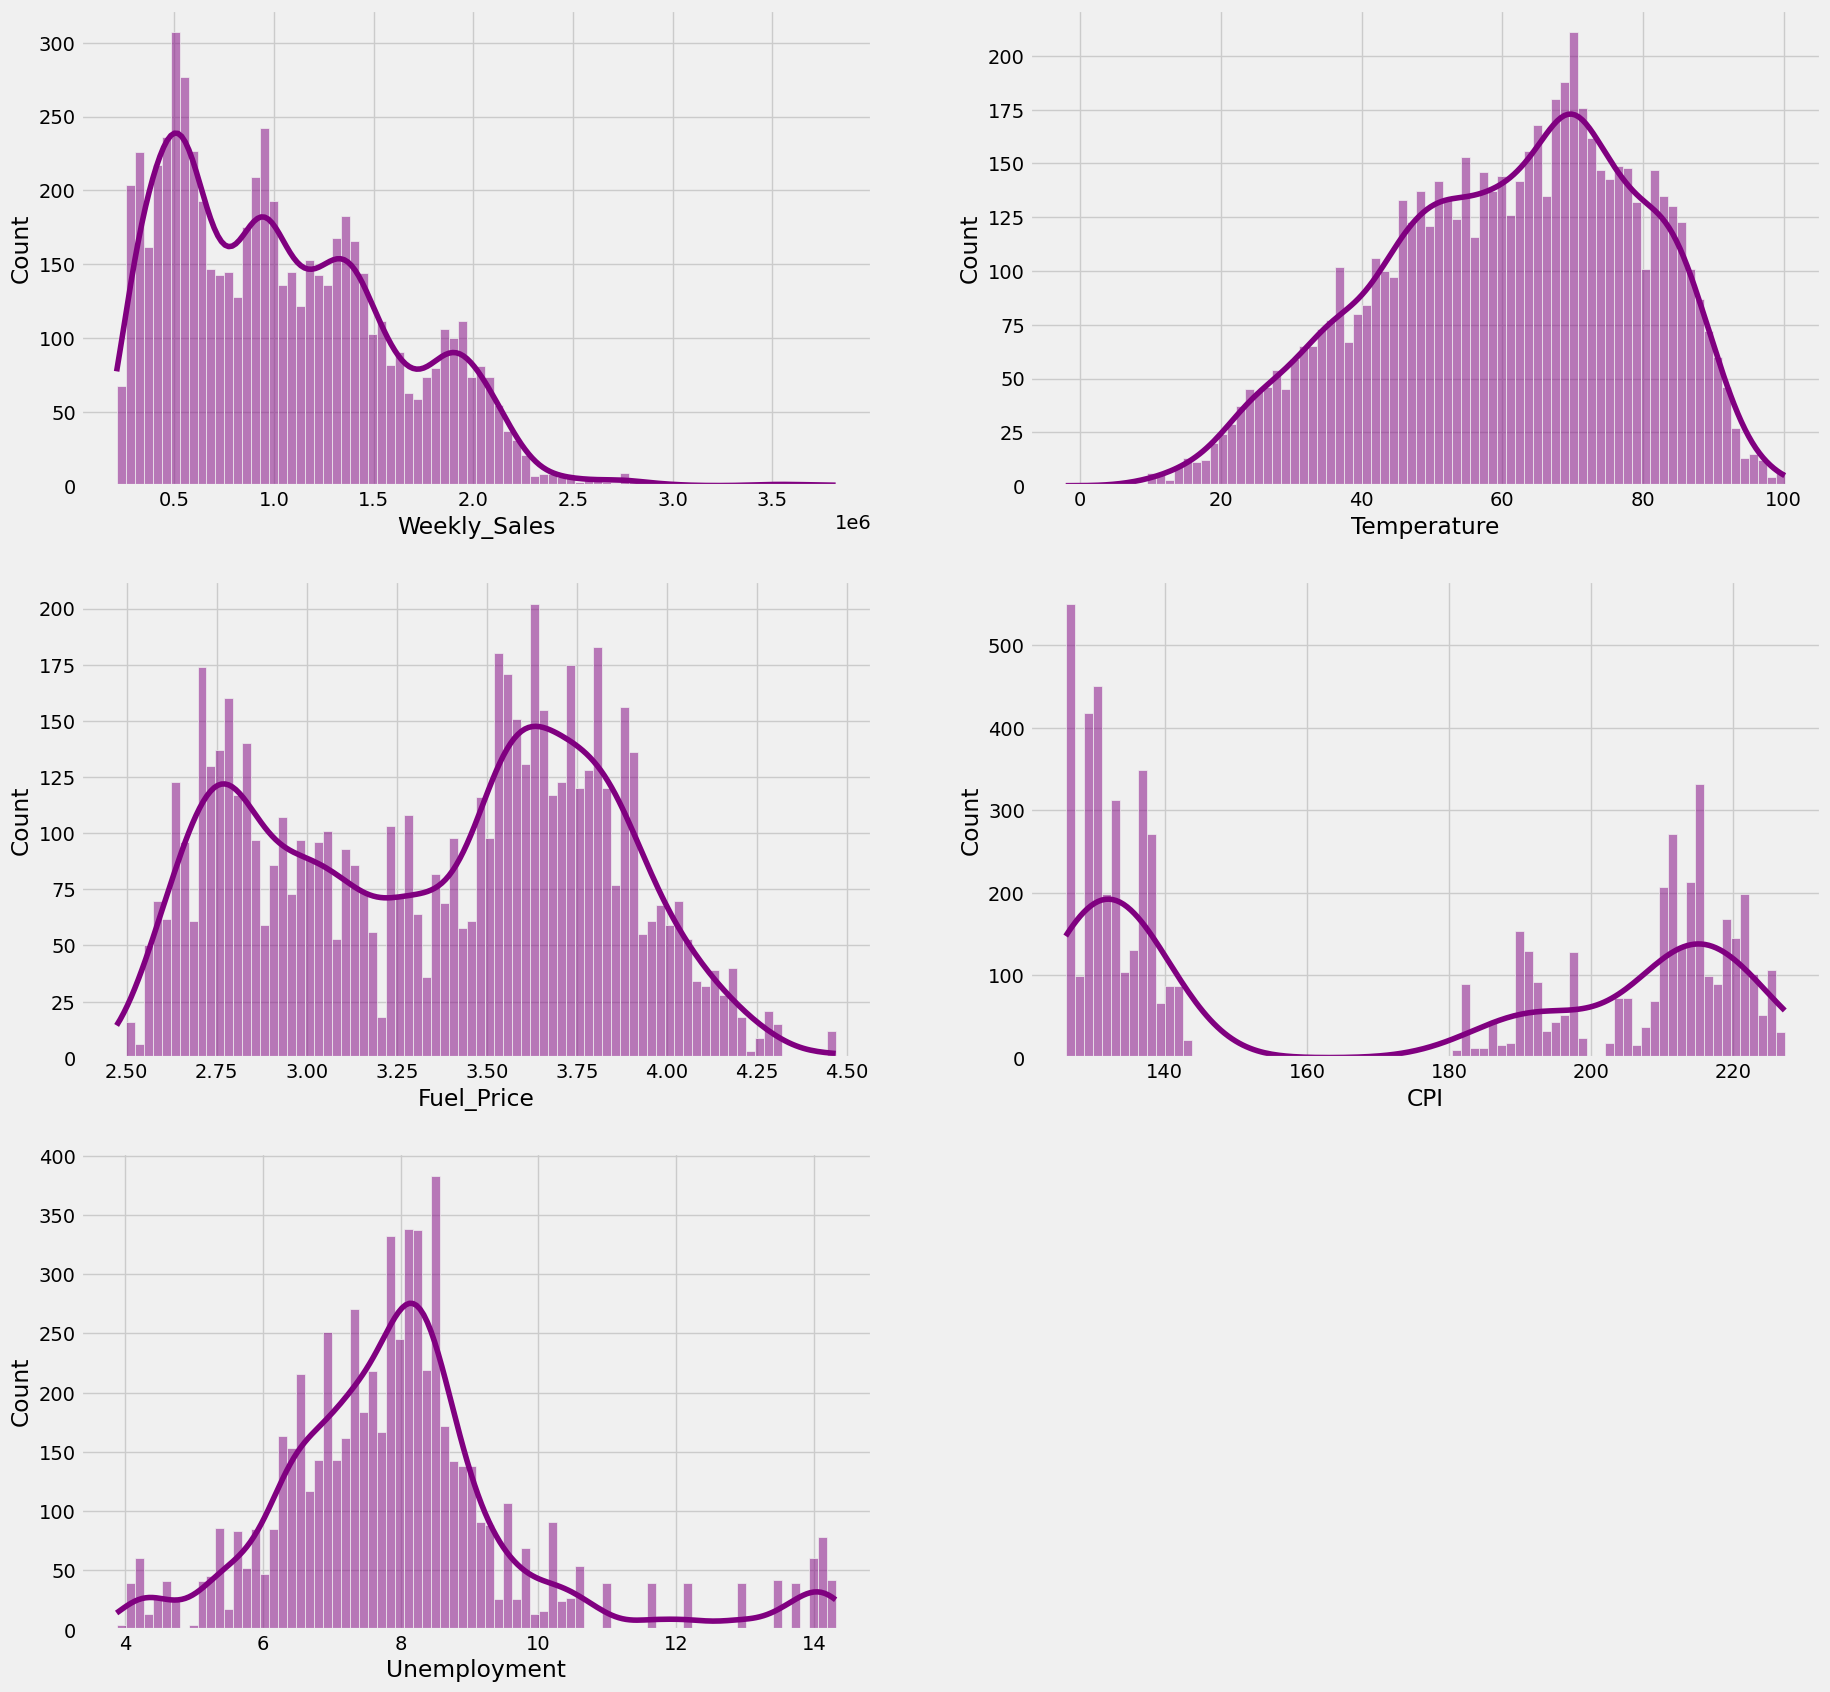

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', "Unemployment"]

plt.figure(figsize=(20, 20))

# iterate through the columns list using enumerate (i=index, col = column name)
for i, col in enumerate(columns):
    # adds a subplot to the figure, (3rows, 2 coluns, i+1 specifies the position on the current grid)
    plt.subplot(3, 2, i+1)
    # applied square root rule for bins counts
    # used to draw a historgram for the data in the column
    sns.histplot(data=dataset, x = col, kde=True, bins=round(np.sqrt(len(dataset))), color='purple')
plt.show()

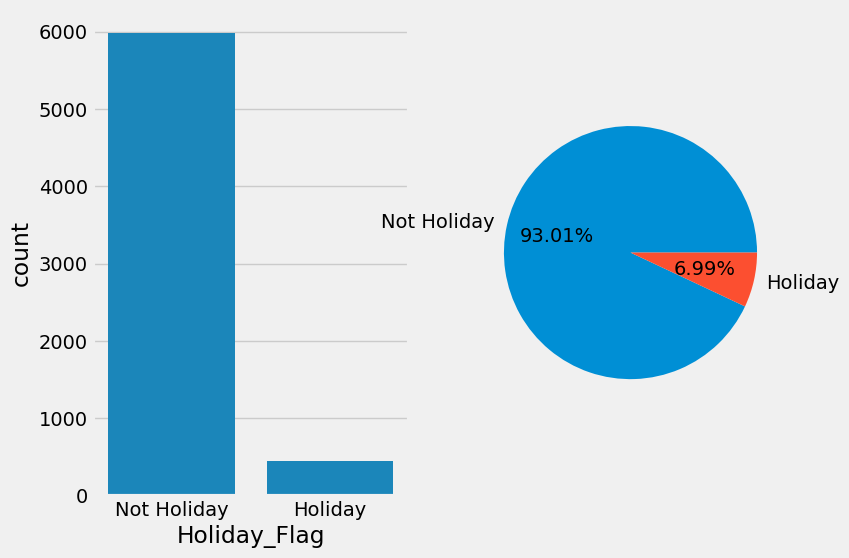

In [157]:
dataset2 = dataset.copy()
dataset2['Holiday_Flag']=dataset2['Holiday_Flag'].map({0:'Not Holiday', 1:'Holiday'})
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

sns.countplot(data=dataset2, x='Holiday_Flag', ax=ax[0])

ax[1].pie(dataset2['Holiday_Flag'].value_counts().values, labels=dataset2['Holiday_Flag'].value_counts().index,autopct='%1.2f%%')
plt.show()

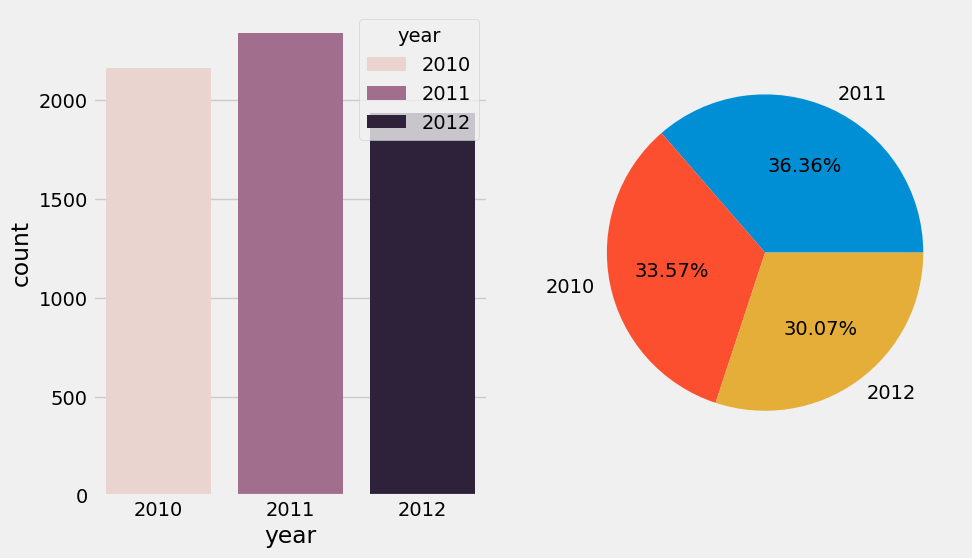

In [158]:
year_counts = dataset['year'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=dataset, x='year', ax=ax[0], hue='year')

ax[1].pie(dataset['year'].value_counts().values, 
          labels=dataset['year'].value_counts().index,
          autopct='%1.2f%%')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'February'),
  Text(1, 0, 'March'),
  Text(2, 0, 'April'),
  Text(3, 0, 'May'),
  Text(4, 0, 'June'),
  Text(5, 0, 'July'),
  Text(6, 0, 'August'),
  Text(7, 0, 'September'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'January')])

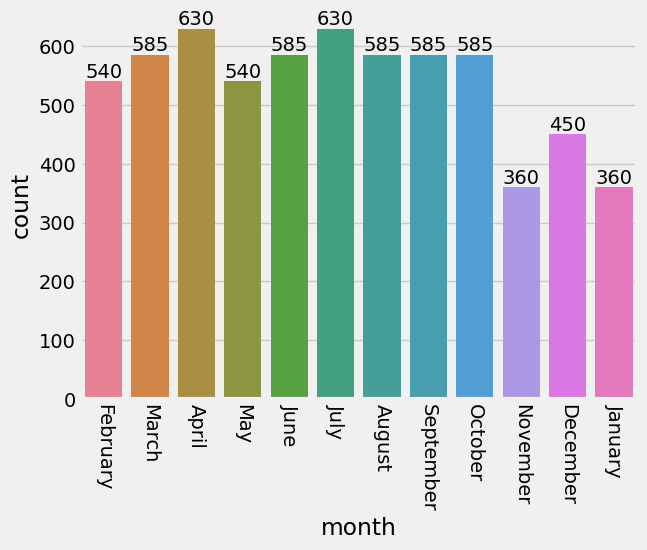

In [159]:
month_counts = dataset['month'].value_counts()
plt.figure(figure = (12, 6))
ax = sns.countplot(data=dataset, x = 'month', hue='month')
for bar in ax.containers:
    # the bars are annotated with labels showing the count of each month
    ax.bar_label(bar)
plt.xticks(rotation=270)

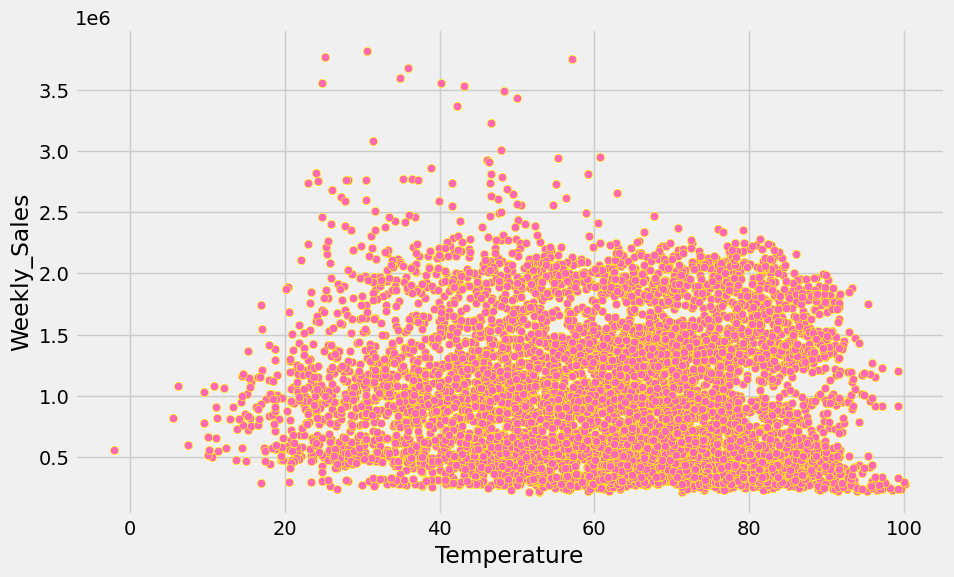

In [160]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dataset, 
                x = 'Temperature', 
                y = 'Weekly_Sales', 
                color='hotpink',
                edgecolor='yellow')


plt.show()

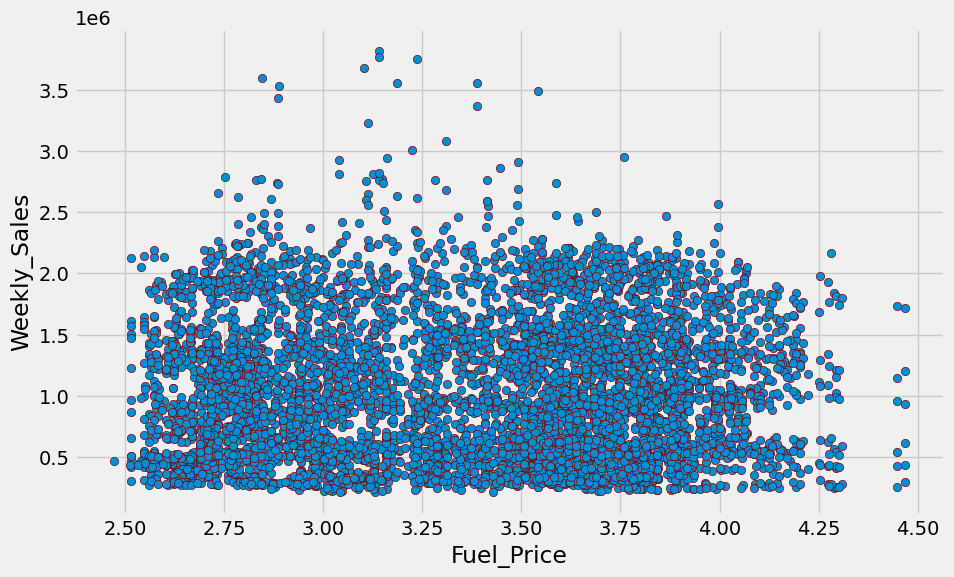

In [161]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dataset, 
                x='Fuel_Price', 
                y='Weekly_Sales', 
                edgecolor='maroon')
plt.show()

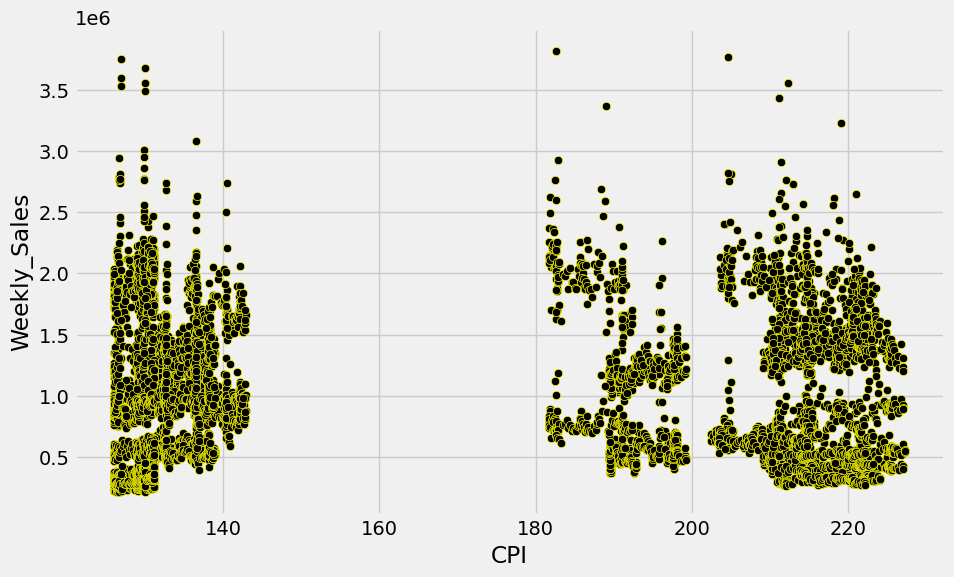

In [162]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dataset, 
                x='CPI',
                y='Weekly_Sales', 
                color='black' ,
                edgecolor='yellow')
plt.show()

## Average sales on holiday and regular days

In [163]:
dataset.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

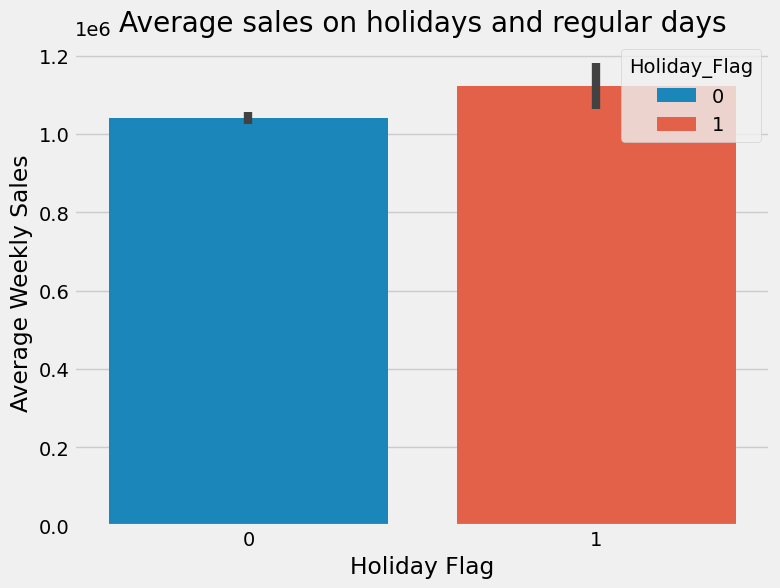

In [164]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, 
            x ='Holiday_Flag',
            y = 'Weekly_Sales', 
            estimator=np.mean, 
            hue="Holiday_Flag")


plt.title("Average sales on holidays and regular days")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Weekly Sales")
plt.show()

## Total sales on holiday and regular days

In [165]:
dataset.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

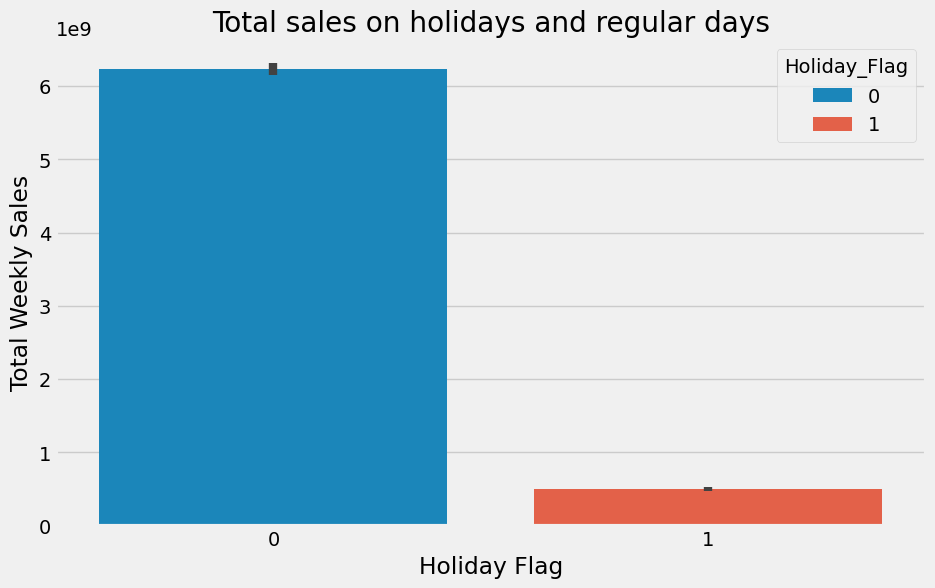

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, 
            x = 'Holiday_Flag', 
            y = "Weekly_Sales", 
            estimator=np.sum, 
            hue="Holiday_Flag")

plt.title("Total sales on holidays and regular days")
plt.xlabel("Holiday Flag")
plt.ylabel("Total Weekly Sales")
plt.show()

## Which Store Branch is performing better? 

<Axes: xlabel='Store'>

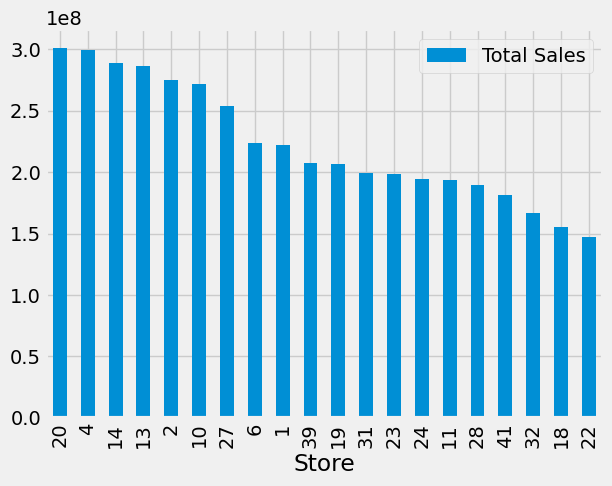

In [167]:
total_sales = dataset.groupby('Store')['Weekly_Sales'].sum().to_frame('Total Sales')
sorted_sales = total_sales.sort_values('Total Sales', ascending=False)

sorted_sales.head(20).plot(kind='bar')

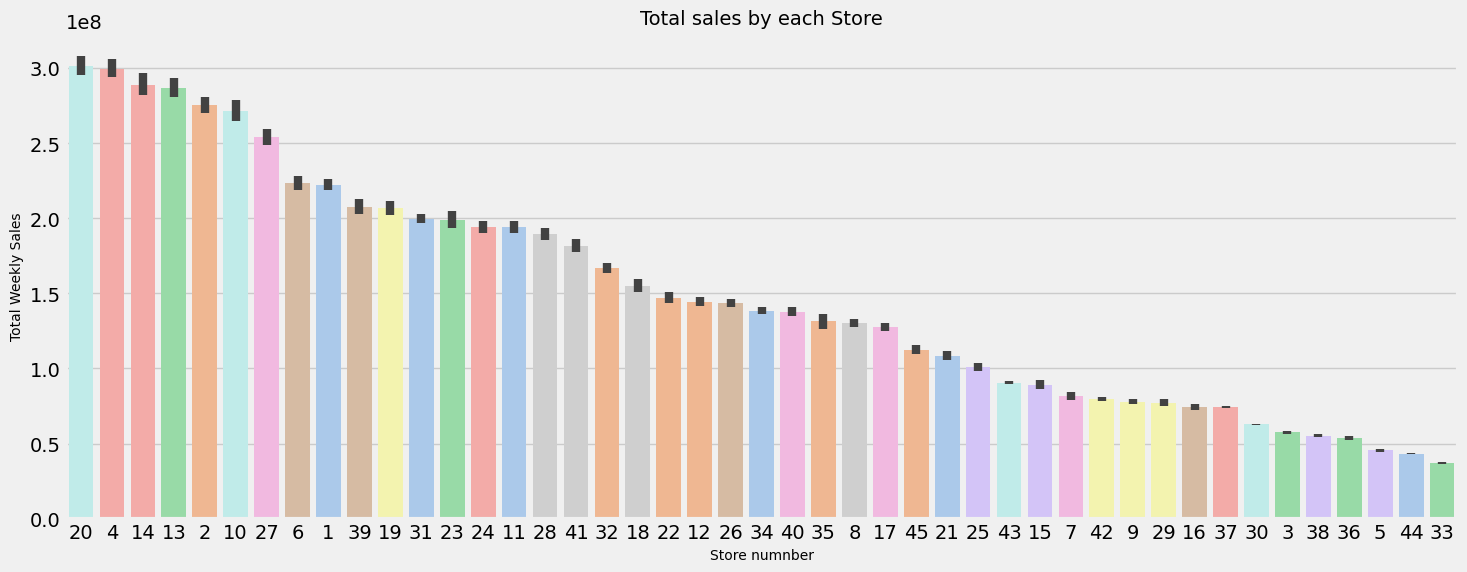

In [168]:
plt.figure(figsize=(16, 6))

sns.barplot(data=dataset, 
            x='Store',
            y='Weekly_Sales', 
            order = sorted_sales.index, 
            hue='Store',
            estimator=np.sum, 
            palette=sns.color_palette('pastel', n_colors=33))

plt.title('Total sales by each Store', size=14)
plt.xlabel('Store numnber', size=10)
plt.ylabel('Total Weekly Sales', size=10)
plt.legend([], frameon=False)
plt.show()

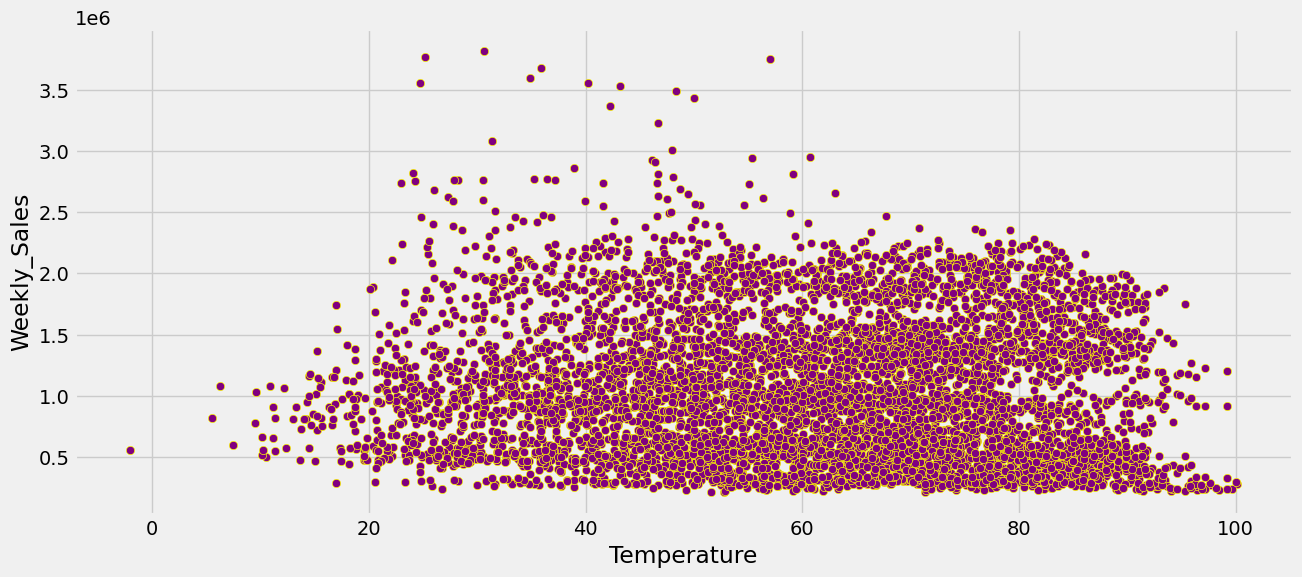

In [169]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=dataset, 
                x = 'Temperature', 
                y = 'Weekly_Sales',
                color='purple',
                edgecolor='yellow')
plt.show()

### Total Sales by each week

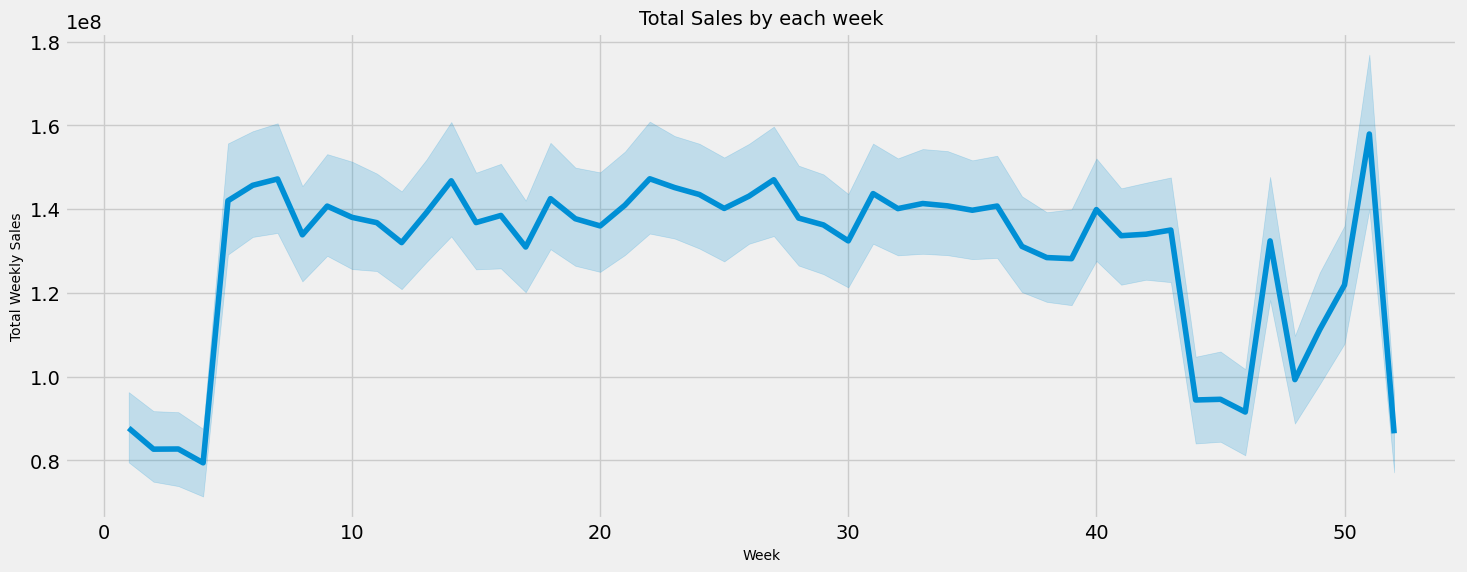

In [170]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=dataset, 
             x = 'week', 
             y = 'Weekly_Sales', 
             estimator=np.sum)


plt.title("Total Sales by each week", size = 14)
plt.xlabel("Week", size=10)
plt.ylabel("Total Weekly Sales", size=10)
plt.show()

In [171]:
pd.pivot_table(data=dataset, 
               index='year', 
               columns='season', 
               values='Weekly_Sales', 
               aggfunc='sum')

season,Fall,Spring,Summer,Winter
year,,,,
2010,7.087757e+08,6.103695e+08,5.974881e+08,3.722528e+08
2011,6.815017e+08,5.979481e+08,6.393585e+08,5.293917e+08
2012,1.843617e+08,6.182977e+08,6.050058e+08,5.924677e+08


### Total sale by each month in each year

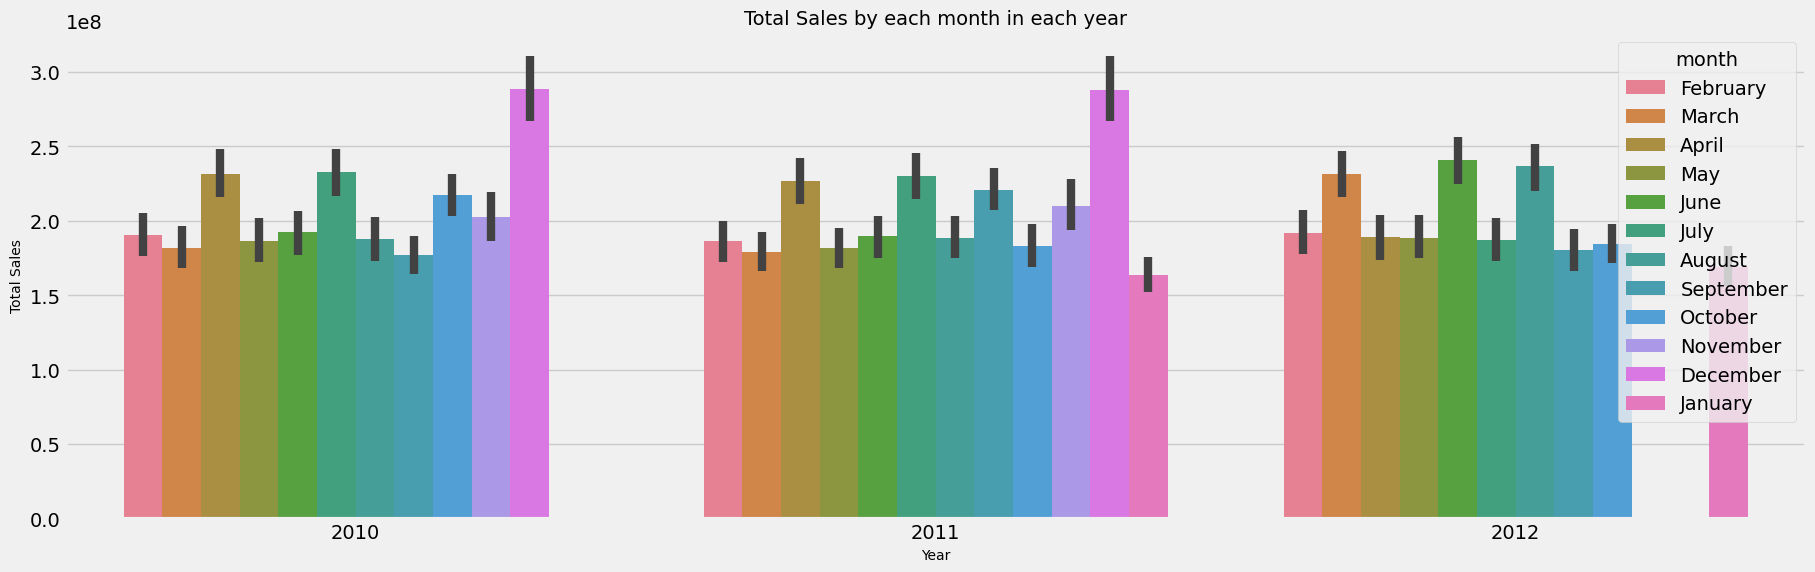

In [178]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, 
            x='year', 
            y='Weekly_Sales', 
            hue='month',
            estimator=np.sum)

plt.title('Total Sales by each month in each year', size=14)
plt.xlabel('Year', size=10)
plt.ylabel('Total Sales', size=10)
plt.show()

### Total Sales by season in each year

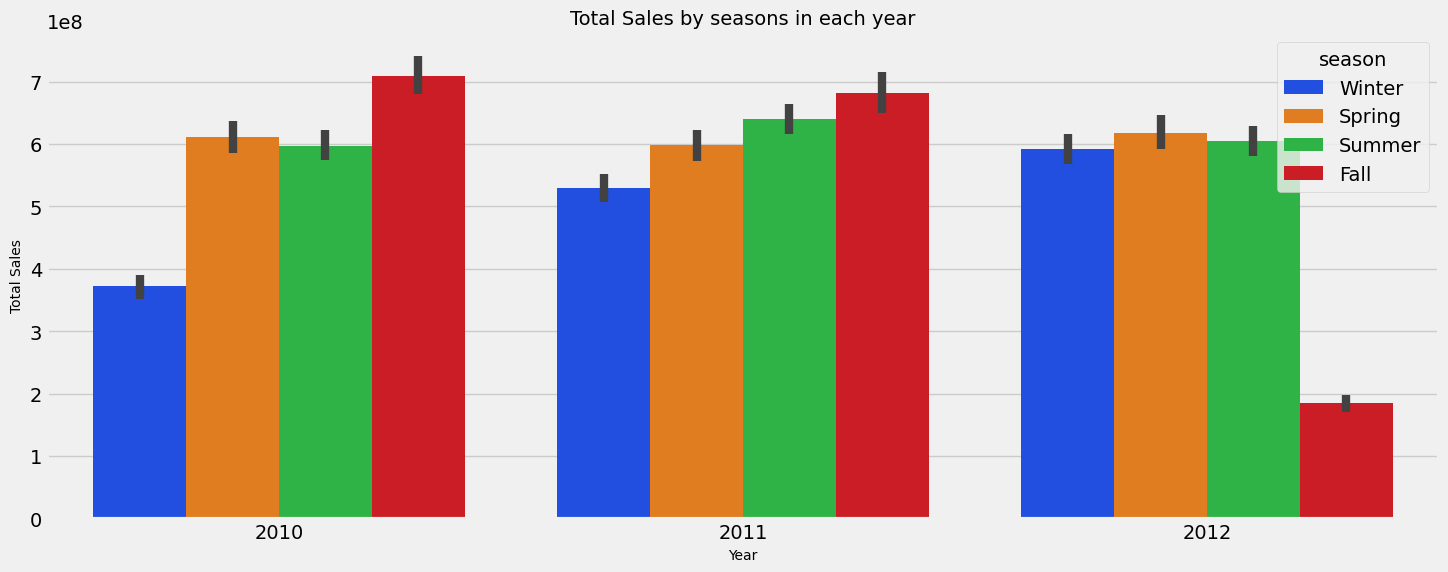

In [181]:
plt.figure(figsize=(16, 6))
sns.barplot(data=dataset, 
            x = 'year', 
            y = 'Weekly_Sales', 
            hue='season', 
            palette= sns.color_palette('bright'),
            estimator=np.sum)

plt.title("Total Sales by seasons in each year", size=14)
plt.xlabel('Year', size=10)
plt.ylabel('Total Sales', size=10)
plt.show()

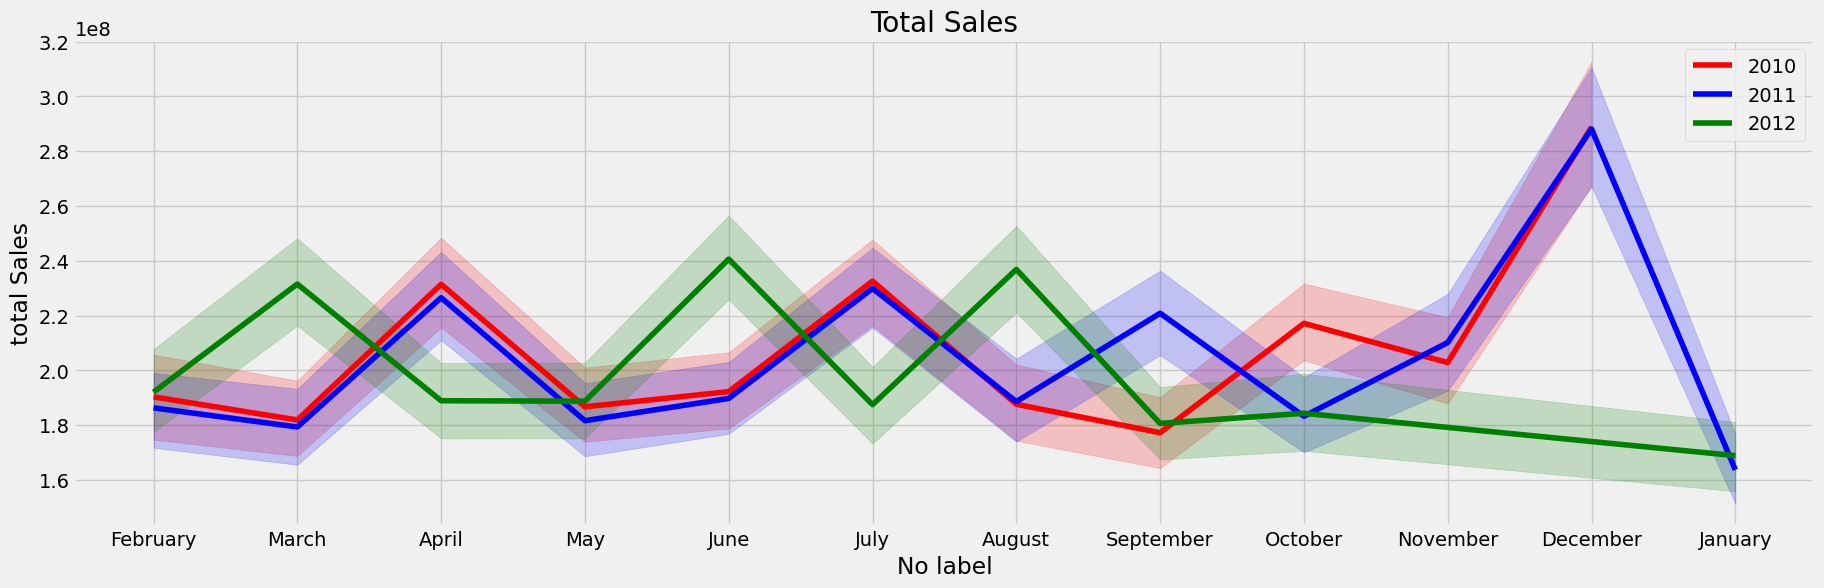

In [182]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize=(20, 6))
for i, year in enumerate(years):
    sns.lineplot(data=dataset[dataset['year']==int(year)],
                 x='month',
                 y='Weekly_Sales',
                 estimator=np.sum,
                 color=colors[i],
                 label=year)

plt.title('Total Sales')
plt.xlabel('No label')
plt.ylabel('total Sales')
plt.show()

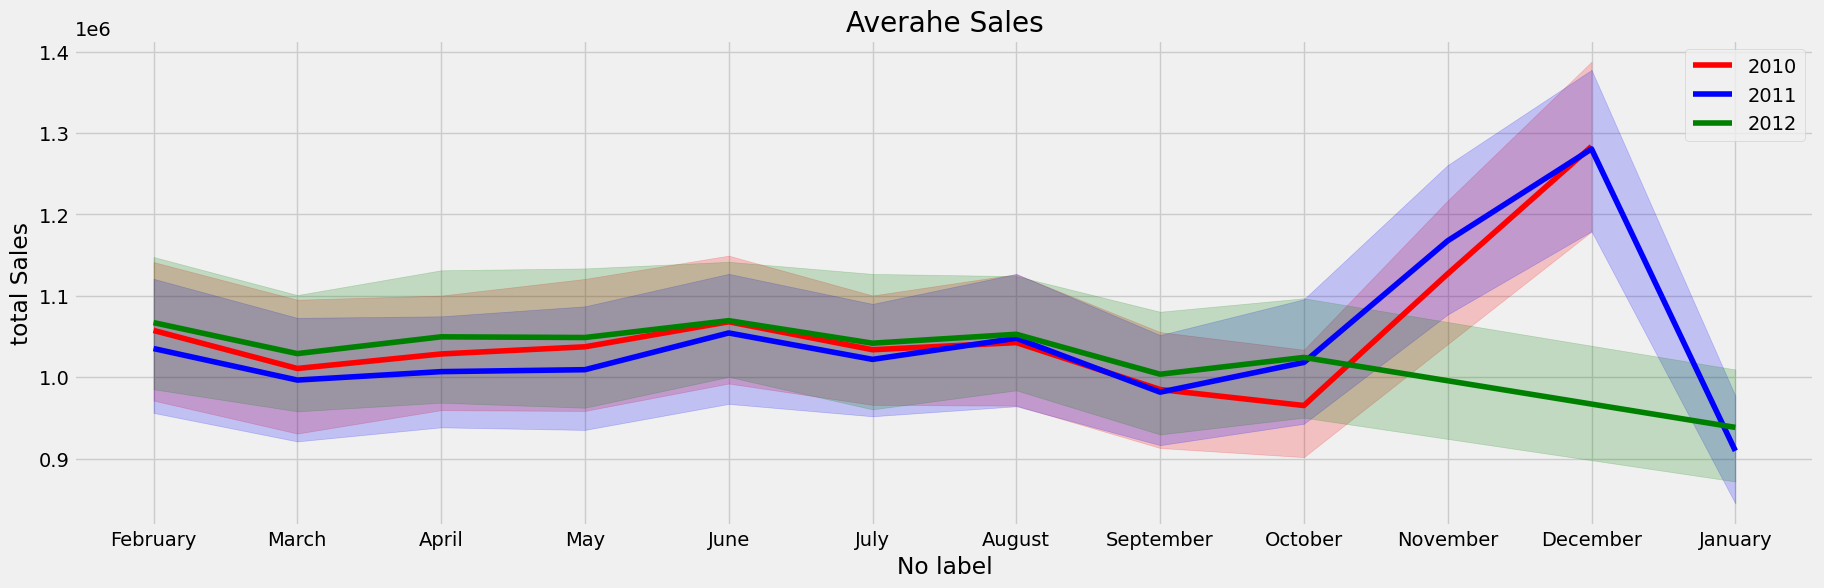

In [184]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize=(20, 6))
for i, year in enumerate(years):
    sns.lineplot(data=dataset[dataset['year']==int(year)],
                 x='month',
                 y='Weekly_Sales',
                 estimator=np.mean,
                 color=colors[i],
                 label=year)

plt.title('Average Sales')
plt.xlabel('No label')
plt.ylabel('total Sales')
plt.show()

## Find the best store for each year

In [187]:
df=dataset.groupby(by=['year','Store'])['Weekly_Sales'].agg('sum').to_frame('Total Sales').reset_index()
df['rank year wise']=df.groupby(by=['year'])['Total Sales'].rank(method='dense',ascending=False)
df[df['rank year wise']==1].reset_index()[['year','Store','Total Sales']]

,year,Store,Total Sales
0,2010,14,1.054622e+08
1,2011,4,1.110923e+08
2,2012,4,9.277119e+07
